# About

此笔记包含了以下内容:

* keras 的基本使用
* 组合特征
* 制作dataset
* 模型的存取(2种方式)
* 添加检查点


In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from tensorflow.keras.utils import plot_model
import os

In [27]:
# fea_x = [i for i in np.arange(0, math.pi * 2.0, 0.01)]
# print(fea_x[:50])

In [3]:
x0 = np.random.randint(0, math.pi * 6.0 * 100.0, 5000) / 100.0
x1 = np.random.randint(0, math.pi * 6.0 * 100.0, 5000) / 100.0
x2 = np.random.randint(0, math.pi * 6.0 * 100.0, 1000) / 100.0 # Noisy

feaY0 = [np.random.randint(10 * math.sin(i), 20) for i in x0]
feaY1 = [np.random.randint(-20, 10 * math.sin(i)) for i in x1]
feaY2 = [np.random.randint(-10, 10) for i in x2]

fea_x = np.concatenate([x0, x1, x2])
fea_y = np.concatenate([feaY0, feaY1, feaY2])

label0 = np.repeat(0, 5000)
label1 = np.repeat(1, 5000)
label2 = np.random.randint(0,2, 1000)
label = np.concatenate([label0, label1, label2])


In [4]:
fea_1 = []
fea_2 = []
fea_3 = []
fea_4 = []
fea_5 = []
for i in range(len(label)):
    x = fea_x[i]
    y = fea_y[i]
    ex_1 = x * y
    ex_2 = x * x
    ex_3 = y * y
    ex_4 = math.sin(x)
    ex_5 = math.sin(y)
    fea_1.append(ex_1)
    fea_2.append(ex_2)
    fea_3.append(ex_3)
    fea_4.append(ex_4)
    fea_5.append(ex_5)
    

In [5]:
fea = np.c_[fea_x, fea_y, fea_1, fea_2, fea_3, fea_4, fea_5]
dataset = tf.data.Dataset.from_tensor_slices((fea, label))
dataset = dataset.shuffle(10000)
dataset = dataset.batch(500)
dataset = dataset.repeat()
ds_iteror = dataset.make_one_shot_iterator().get_next()

W0918 10:28:35.711431 4752016832 deprecation.py:323] From <ipython-input-5-ddde1f6f3511>:6: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


In [208]:
len(fea[0])

7

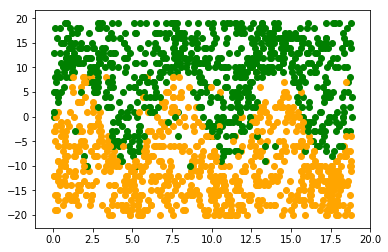

In [6]:
with tf.Session() as sess:
    def _pltfunc(sess):
        res = sess.run(ds_iteror)
    #     print(res)
        lb = res[1]
        t_fea = res[0]
        for index in range(len(lb)):
            tfs = t_fea[index]
            if lb[index] > 0:
                plt.scatter(tfs[0], tfs[1], marker='o', c='orange')
            else:
                plt.scatter(tfs[0], tfs[1], marker='o', c='green')
    
    _pltfunc(sess)
    _pltfunc(sess)
    _pltfunc(sess)

            
plt.show()

In [7]:
inputs = tf.keras.Input(shape=(7, ))

x = layers.Dense(7, activation=tf.keras.activations.relu)(inputs)
x1 = layers.Dense(7, activation='relu')(x)
# x2 = layers.Dense(32, activation='relu')(x1)
# x3 = layers.Dense(24, activation='relu')(x2)
# x4 = layers.Dense(16, activation='relu')(x3)
# x5 = layers.Dense(8, activation='relu')(x4)
predictions = layers.Dense(2, activation='softmax')(x1)

W0918 10:28:44.855381 4752016832 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
model = tf.keras.Model(inputs=inputs, outputs=predictions)

# The compile step specifies the training configuration.
# opt = tf.train.AdamOptimizer(learning_rate=0.0001)
opt = tf.train.AdagradOptimizer(learning_rate=0.1)
# opt = tf.train.RMSPropOptimizer(0.1)
model.compile(optimizer=opt,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.fit(dataset, epochs=10, steps_per_epoch=200)
# model.fit(fea, label, epochs=10, batch_size=500, steps_per_epoch=300)

W0918 10:28:54.534353 4752016832 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/training/adagrad.py:76: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4831 - acc: 0.8294
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2935 - acc: 0.8567
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2865 - acc: 0.8591A: 0s - loss: 0.2871 - acc: 0.858
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2828 - acc: 0.8624
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2758 - acc: 0.8694
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2707 - acc: 0.8761
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2642 - acc: 0.8852
Epoch 8/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2566 - acc: 0.8936
Epoch 9/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2496 - acc: 0.9009
Epoch 10/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2428 - acc: 0.9052


In [9]:
model.fit(dataset, epochs=10, steps_per_epoch=200)

Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2353 - acc: 0.9100
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2321 - acc: 0.9133
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2279 - acc: 0.9157
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2253 - acc: 0.9177
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2238 - acc: 0.9190
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2241 - acc: 0.9200
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2228 - acc: 0.9214
Epoch 8/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2220 - acc: 0.9222
Epoch 9/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2212 - acc: 0.9219
Epoch 10/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2204 - acc: 0.9233


In [112]:
result = model.predict([[[1, -10]]])
print(np.argmax(result[0]))

result = model.predict([[[1, 10]]])
print(np.argmax(result[0]))

1
0


In [232]:
os.getcwd()

'/Users/languilin/WorkSpace/Private/MachineLearning/TFLearning'

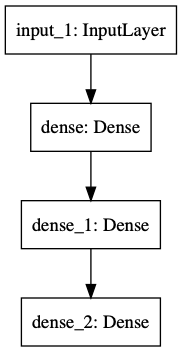

In [10]:
# 模型可视化
plot_model(model, to_file=os.getcwd()+ '/model.png')

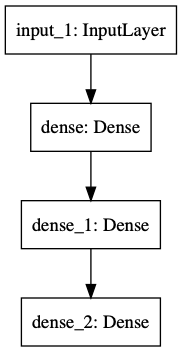

In [17]:
from IPython.display import SVG
import tensorflow.keras.utils as tfku

tfku.plot_model(model)
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

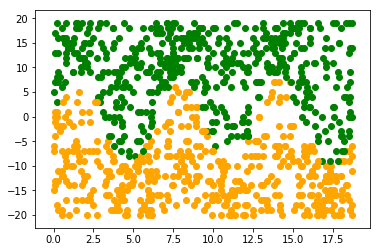

In [227]:
for i in range(1000):
    randomX = np.random.randint(0, 10 * math.pi * 6.0) / 10.0
    randomY = 0
    if np.random.randint(2) > 0:
        randomY = np.random.randint(10 * math.sin(randomX), 20)
    else:
        randomY = np.random.randint(-20, 10 * math.sin(randomX))
    ex_1 = randomX * randomY
    ex_2 = randomX**2
    ex_3 = randomY**2
    ex_4 = math.sin(randomX)
    ex_5 = math.sin(randomY)
    
    color = ''
    result = model.predict([[[randomX, randomY, ex_1, ex_2, ex_3, ex_4, ex_5]]])
    pred_index = np.argmax(result[0])
    if pred_index > 0:
        color = 'orange'
    else:
        color = 'green'
    plt.scatter(randomX, randomY, marker='o', c=color)
plt.show()

# Save Model

In [18]:
!pip install h5py pyyaml

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
model_path = os.getcwd() + "/mymodel.h5"
model_path

'/Users/languilin/WorkSpace/Private/MachineLearning/TFLearning/mymodel.h5'

这里使用默认的优化器, 默认优化器不能直接保存, 读取模型时需要再次创建优化器并编译
使用 keras 内置的优化器可以直接保存和读取, 比如: `tf.keras.optimizers.Adam()`

In [20]:
model.save(model_path)

W0919 14:36:37.931401 4752016832 hdf5_format.py:110] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file. You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).


In [21]:
new_model = tf.keras.models.load_model(model_path)
opt = tf.train.AdagradOptimizer(learning_rate=0.1)
# opt = tf.train.RMSPropOptimizer(0.1)
new_model.compile(optimizer=opt,
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

new_model.summary()

W0919 14:43:45.045204 4752016832 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0919 14:43:45.047919 4752016832 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0919 14:43:45.427887 4752016832 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 16        
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [23]:
loss, acc = new_model.evaluate(dataset, steps=200)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


200/200 [==============================] - 1s 3ms/step - loss: 0.2201 - acc: 0.9251
Restored model, accuracy: 92.51%


In [27]:
print(new_model.layers[1].get_weights())

[array([[-0.18513356, -0.5944598 , -0.31596622, -0.5336512 ,  0.21966298,
         0.4753986 ,  0.41855925],
       [-0.51090246, -0.6128717 ,  0.57087266,  0.90797025, -0.67894036,
         0.12775406, -0.46071798],
       [-0.09616593,  0.18898904,  0.36915025,  0.22494109, -0.4048719 ,
         0.08799099, -0.17466974],
       [ 0.47254115, -0.59851056, -0.64332885, -0.07513103,  0.27138317,
        -0.5164682 ,  0.17601056],
       [ 0.4152183 , -0.5027053 ,  0.18780918,  0.10085826,  0.04974491,
        -0.28167075, -0.01286947],
       [ 0.87135893,  0.6427965 , -0.28651774, -0.9457015 ,  2.4377482 ,
         0.35147208, -4.6972322 ],
       [-0.41829014,  0.22775614,  0.51005393, -0.78283525,  0.3037345 ,
         0.23245245, -0.29947385]], dtype=float32), array([ 0.1523906 ,  0.02099093, -0.01079311,  0.20105849, -0.00879347,
       -0.02339827,  0.32012293], dtype=float32)]


In [29]:
print(new_model.layers[3].get_weights())

[array([[ 0.06555444, -0.5212194 ],
       [-0.5949386 , -0.09970472],
       [-0.37951565, -0.21464492],
       [-0.13808419,  0.24510457],
       [ 0.36669165, -0.2663816 ],
       [ 0.45086718, -0.26410016],
       [-0.04899281, -0.6156222 ]], dtype=float32), array([-0.4162824,  0.4162828], dtype=float32)]


# 保存为 pb 文件

In [30]:
pb_model_path = os.getcwd() + '/pbmdoel'
pb_model_path

'/Users/languilin/WorkSpace/Private/MachineLearning/TFLearning/pbmdoel'

In [31]:
tf.contrib.saved_model.save_keras_model(new_model, pb_model_path)

W0919 14:54:26.258198 4752016832 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:253: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0919 14:54:26.259163 4752016832 export_utils.py:182] Export includes no default signature!
W0919 14:54:26.461674 4752016832 export_utils.py:182] Export includes no default signature!


In [32]:
!ls {pb_model_path}

assets         saved_model.pb variables


# 读取 pb 文件

In [33]:
model2 = tf.contrib.saved_model.load_keras_model(pb_model_path)
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 16        
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 使用前要先编译
model2.compile(optimizer=opt,
                loss=tf.keras.losses.sparse_categorical_crossentropy,
                metrics=['accuracy'])

loss, acc = model2.evaluate(dataset, steps=200)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

200/200 [==============================] - 0s 2ms/step - loss: 0.2203 - acc: 0.9250
Restored model, accuracy: 92.50%
